<a href="https://colab.research.google.com/github/arielle-k/DL-model-for-predict-number-in-a-image/blob/main/First_Model_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#prediction d'un chiffre à partir  d'une image

In [ ]:
#importation des librairies
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models,layers

In [ ]:
#importation de la base de donnees(#https://keras.io/api/datasets/)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
np.min(X_train)

0

In [ ]:
np.max(X_train)

255

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Code pour afficher les images

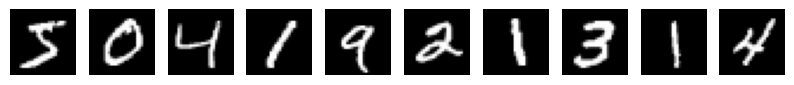

In [ ]:
import matplotlib.pyplot as plt
# Afficher 10 images du dataset
# Crée une nouvelle figure de taille 10x1 pouces
plt.figure(figsize=(10, 1))

# Boucle sur les 10 premières images de X_train
for i in range(10):
    # Ajoute un sous-plot dans une grille de 1 ligne par 10 colonnes
    plt.subplot(1, 10, i+1)
    # Affiche l'image i de X_train en niveaux de gris
    plt.imshow(X_train[i], cmap='gray')
    # Désactive les axes pour une visualisation plus propre
    plt.axis('off')

# Affiche la figure contenant les 10 images
plt.show()

## Normalisation des images pour ameliorer la stabilite de mon modèle

In [ ]:
# Normalisation des données
# Les valeurs de pixels dans les images MNIST vont de 0 à 255.
# - 0 représente le noir complet
# - 255 représente le blanc complet
# Nous divisons ces valeurs par 255 pour les ramener dans la plage [0, 1].
# Cela améliore la stabilité numérique et accélère la convergence du modèle d'apprentissage.
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Encodage de nos etiquettes


In [ ]:
from tensorflow.keras.utils import to_categorical
# Les étiquettes sont converties en vecteurs binaires.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

#Construction du modèle

In [ ]:
# Construction du modèle de réseau de neurones
model = models.Sequential()

# Aplatissement des images 28x28 en un vecteur de 784 éléments
# Le modèle de réseau de neurones denses nécessite un vecteur d'entrée 1D,
# donc nous devons aplatir les images 2D en un vecteur 1D.
model.add(layers.Flatten(input_shape=(28, 28)))  # Aplatissement des images 28x28 en un vecteur de 784 éléments
model.add(layers.Dense(128, activation='relu'))  # Première couche dense avec 128 neurones et activation ReLU
model.add(layers.Dense(64, activation='relu'))  # Deuxième couche dense avec 64 neurones et activation ReLU
model.add(layers.Dense(10, activation='softmax'))  # Couche de sortie avec 10 neurones (un pour chaque chiffre) et activation softmax

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compilation et entrainement du modèle

In [ ]:
# Compilation du modèle
# Nous utilisons 'adam' comme optimiseur car il est efficace et largement utilisé.
# 'categorical_crossentropy' est utilisé comme fonction de perte car nous avons des étiquettes catégorielles.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Entraînement du modèle
# Nous entraînons le modèle sur les données d'entraînement (X_train, y_train) et validons sur les données de test (X_test, y_test).
hisory=model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 14s 8ms/step - loss: 0.2708 - accuracy: 0.9210 - val_loss: 0.1444 - val_accuracy: 0.9572
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1150 - accuracy: 0.9654 - val_loss: 0.1054 - val_accuracy: 0.9706
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0771 - accuracy: 0.9755 - val_loss: 0.0897 - val_accuracy: 0.9723
Epoch 4/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0568 - accuracy: 0.9826 - val_loss: 0.0930 - val_accuracy: 0.9719
Epoch 5/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0455 - accuracy: 0.9849 - val_loss: 0.0964 - val_accuracy: 0.9717


In [ ]:
# Évaluation du modèle
# Nous évaluons les performances du modèle sur les données de test.
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - loss: 0.0935 - accuracy: 0.9724 - 553ms/epoch - 2ms/step

Test accuracy: 0.9724000096321106


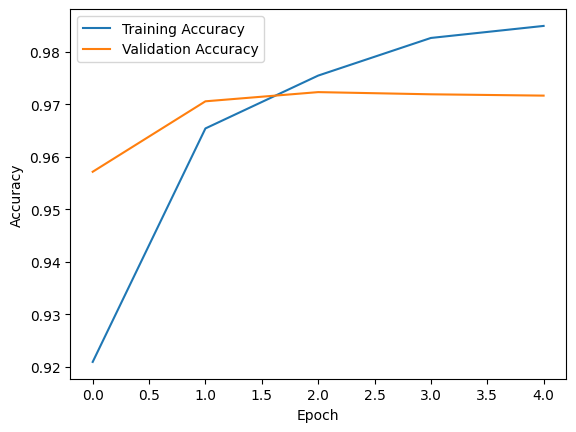

In [ ]:
# Visualisation des performances de l'entraînement
plt.plot(hisory.history['accuracy'], label='Training Accuracy')
plt.plot(hisory.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

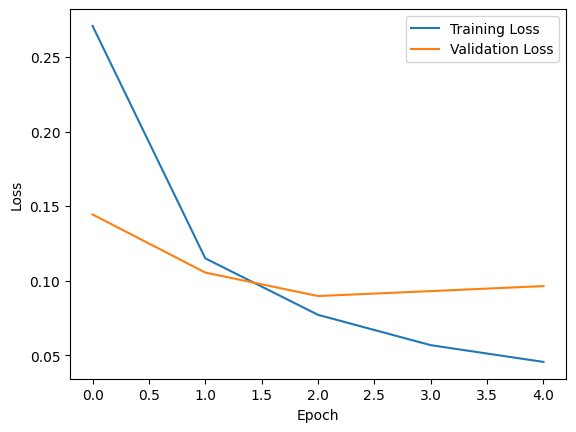

In [ ]:
plt.plot(hisory.history['loss'], label='Training Loss')
plt.plot(hisory.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Prédiction sur une nouvelle base de données (exemple avec les données de test)
predictions = model.predict(X_test[:10])

1/1 [==============================] - 0s 102ms/step


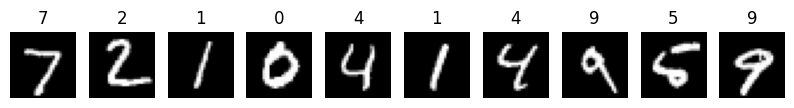

In [ ]:
# Affichage des prédictions pour les 10 premières images du dataset de test
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(np.argmax(predictions[i]))
    plt.axis('off')
plt.show()